In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('csv/problem-8-4.csv')

<h3>Problem 8.4</h3>
<p>Anda diberi data seluruh digimon yang dapat ditangkap maupun dilawan dari permainan "Digimon Story: Cyber Sleuth (PS Vita / PS 4)". Tuliskan/Gambarkan:</p>

<ol>
    <li>Banyaknya data</li>
    <li>Banyaknya unique value dari kolom Type beserta isinya</li>
    <li>Bar chart dengan Stage sebagai sumbu x dan jumlah digimon sebagai sumbu y</li>
    <li>Pie chart banyaknya digiomon dengan Attribute "Fire" terhadap Stage tertentu</li>
    <li>Berdasarkan plot sebelumnya, Stage apa yang memiliki jumlah digimon paling banyak untuk Attribute "Fire"?</li>
    <li>Stacked bar chart dengan Attribute sebagai sumbu x dan jumlah digimon setiap Type sebagai stacked sumbu y</li>
    <li>Berdasarkan plot sebelumnya. Attribut apa yang memilik jumlah digimon paling banyak untuk Type "Virus"</li>
    <li>Line chart dengan Stage selain "Armor" tanpa perubahan urutan sebagai sumbu x dan rata-rata Lv50 Spd sebagai sumbu y</li>
    <li>Berdasarkan plot sebelumnya. apakah secara mayoritas pertumbuhan Stage meningkatkan potensi Spd dari digimon?</li>
    <li>Line chart seperti soal sebelumnya, namun terdapat 5 garis, masing-masing untuk setiap Type</li>
    <li>Berdasarkan plot sebelumnya, Type apa yang memiliki potensi Spd mayoritas paling rendah untuk Stage "Rookie" sampai "Mega"?</li>
</ol>

In [4]:
# 1. Banyaknya data
len(df)

249

In [16]:
# 2. Banyaknya uniqe value dari kolom type beserta isinya
len(df.Type.unique())

4

<AxesSubplot:>

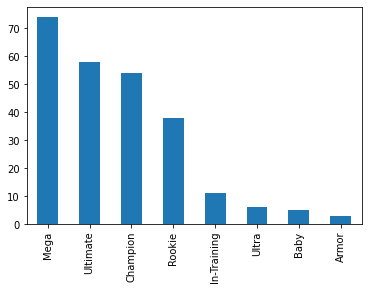

In [18]:
# 3. Bar chart dengan Stage sebagai sumbu X dan jumlah digimon sebagai sumbu Y
df['Stage'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Stage'>

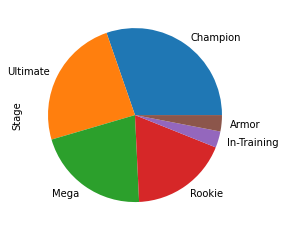

In [19]:
# 4. Pie chart banyaknya digimin dengan Attribute "Fire" terhadap Stage tertentu
df.loc[df['Attribute'] == 'Fire']['Stage'].value_counts().plot(kind='pie')

In [20]:
# 5. Berdasarkan plot sebelumnya., Stage apa yang memiliki jumlah digimon paling banyak untuk stacked sumbu Y

# Stage Champion adalah stage yang paling banyak jumlah digimonnya
df.loc[df['Attribute'] == 'Fire']['Stage'].value_counts().sort_values(ascending=False)

Champion       10
Ultimate        8
Mega            7
Rookie          6
In-Training     1
Armor           1
Name: Stage, dtype: int64

<AxesSubplot:xlabel='Attribute'>

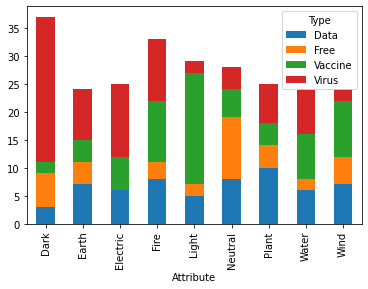

In [31]:
# 6. Stacked bar chart dengan Attribute dengan sumbu X dan jumlah digimon tiap Type sebagai stacked sumbu Y
df.groupby(['Attribute', 'Type'])['Digimon'].size().unstack().plot(kind='bar', stacked=True)

In [32]:
# 7. Berdasarkan plot sebelumnya, Attribute apa yang memiliki jumlah digimon paling banyak untuk Type "Virus" ?

# Attribute dark memiliki jumlah digimon tipe "Virus" paling banyak
df.loc[df['Type'] == 'Virus']['Attribute'].value_counts().sort_values(ascending=False)

Dark        26
Electric    13
Fire        11
Earth        9
Water        8
Plant        7
Neutral      4
Light        2
Wind         2
Name: Attribute, dtype: int64

<AxesSubplot:xlabel='Stage'>

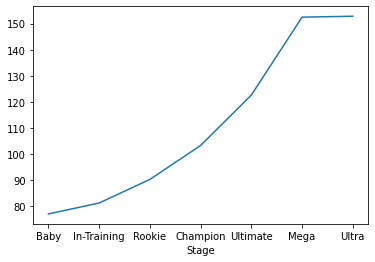

In [35]:
# 8. Line chart dengan Stage selain "Armor" tanpa perubahan urutan sebagai sumbu X dan rata-rata Lv50 Spd sebagai sumbu Y
df.loc[df['Stage'] != 'Armor'].groupby(['Stage'], sort=False)['Lv50 Spd'].mean().plot(kind='line')

In [36]:
# 9. Berdasarkan plot sebelumnya, apakah secara mayoritas pertumbuhan Stage meningkatkan potensi Spd dari digimon ?

# Peningkatan Stage cenderung meningkatkan rata-rata potensi Spd, yaitu Lv50 Spd
df.loc[df['Stage'] != 'Armor'].groupby(['Stage'], sort=False)['Lv50 Spd'].mean()

Stage
Baby            77.000000
In-Training     81.181818
Rookie          90.236842
Champion       103.259259
Ultimate       122.586207
Mega           152.486486
Ultra          152.833333
Name: Lv50 Spd, dtype: float64

<AxesSubplot:xlabel='Stage'>

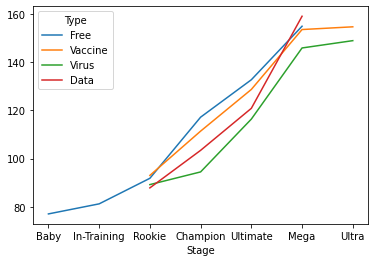

In [38]:
# 10. Line chart seperti soal sebelumnya, namun terdapat 5 garis. masing-masing untuk setiap type
df.loc[df['Stage'] != 'Armor'].groupby(['Stage', 'Type'], sort=False)['Lv50 Spd'].mean().unstack().plot(kind='line')

In [42]:
# 11. Berdasarkan plot sebelumnya. Type apa yang memiliki potensi Spd mayoritas paling rendah untuk Stage "Rookie" sampai "Mega" ?

# Type yang memiliki potensi Spd paling rendah untuk stage "Rookie" sampai "Mega" adalah "Virus"
df.loc[df['Stage'] != 'Armor'].groupby(['Stage', 'Type'], sort=False)['Lv50 Spd'].mean().unstack()[2:6]

Type,Free,Vaccine,Virus,Data
Stage,,,,
Rookie,91.80,93.000000,89.181818,87.818182
Champion,117.20,111.400000,94.454545,103.416667
Ultimate,132.75,128.722222,116.400000,120.875000
Mega,155.00,153.619048,145.962963,159.142857
